In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
dfall = pd.read_csv('builtinnyc_data.csv', thousands=',')

In [3]:
dfall.shape

(4991, 11)

In [4]:
len(dfall.i_name.unique())

3435

In [5]:
dfall.sample(10)

,Unnamed: 0,address,company,date,description,funding,i_name,job_type,jobs,loc_employ,tot_employ
408,119,"625 6th Ave, New York, NY 10011",eBay,1995.0,"eBay is where the world goes to shop, sell and...",NaN,eBay,eCommerce,NaN,527.0,25304.0
1742,73,"New York , NY",Pijon,NaN,"SpaceSplitter, dba Pijon, allows users to send...",NaN,Pijon,Consumer Web + Kids + Family,NaN,NaN,NaN
4022,285,"New York , NY",Amplfy.me,NaN,Amplify.me is a New York-based stealth technol...,NaN,Amplfy.me,NaN,NaN,NaN,NaN
1930,65,"2225 Lawson Lane, Santa Clara, CA 95054",ServiceNow,NaN,ServiceNow is the fastest-growing enterprise c...,NaN,ServiceNow,Software,NaN,NaN,NaN
2692,38,"3600 Spruce St, Philadelphia, PA 19104",ThirdEye,NaN,We believe in empowering the blind; ThirdEye i...,NaN,ThirdEye,Healthtech,NaN,NaN,NaN
1234,157,"New York , NY",Vizzuality,2009.0,Vizzuality is building an open source tool tha...,NaN,Vizzuality,Software + News + Entertainment,NaN,NaN,NaN
2536,82,"1 World Trade Center , New York, NY 10007",Symphony,NaN,Symphony transforms the way users communicate ...,NaN,Symphony,Information Technology,NaN,NaN,NaN
1466,194,NaN,Enpass,NaN,Sinew Software Systems is the maker of Enpass ...,NaN,Enpass,Software,NaN,NaN,NaN
3277,623,NaN,JackDB,2014.0,JackDB is a software company that designs and ...,NaN,JackDB,Big Data,NaN,NaN,NaN
907,25,"1740 Broadway 15th Floor, New York, NY 10019",SMB Compass,2017.0,SMB Compass is a bespoke business financing an...,NaN,SMB Compass,Fintech,NaN,NaN,NaN


In [6]:
dfall['jobs'] = dfall['jobs'].apply(lambda x: x.split(' ')[1] if x==x else x)

In [7]:
dfall['jobs'] = dfall['jobs'].apply(lambda x: float(x) if x==x else x)

In [8]:
dfall['funding'] = dfall['funding'].apply(lambda x: x[1:-1] if x==x else x)

In [9]:
dfall['funding'] = dfall['funding'].apply(lambda x: float(x) if x==x else x)

In [10]:
def job_split(jobs, index):
    jobs = jobs.split(' + ')
    try:
        jobs[index]
    except: 
        return None
    return jobs[index]
        

In [11]:
dfall['job_t0'] = dfall['job_type'].apply(lambda x: job_split(x,0) if x==x else x)

In [12]:
dfall['job_t1'] = dfall['job_type'].apply(lambda x: job_split(x,1) if x==x else x)

In [13]:
dfall['job_t2'] = dfall['job_type'].apply(lambda x: job_split(x,2) if x==x else x)

In [14]:
dfall['g_rate'] = dfall['tot_employ']/(2021 - dfall['date'])

In [15]:
dfall.head()

,Unnamed: 0,address,company,date,description,funding,i_name,job_type,jobs,loc_employ,tot_employ,job_t0,job_t1,job_t2,g_rate
0,0,Our office is located steps from Madison Squar...,Brigit,2017.0,Brigit is a mission-driven start-up that is di...,NaN,Brigit,Fintech,9.0,37.0,37.0,Fintech,None,None,9.250000
1,1,Our office is located in Midtown West - which ...,Zearn,2012.0,We are a nonprofit curriculum publisher and so...,NaN,Zearn,Edtech,1.0,30.0,60.0,Edtech,None,None,6.666667
2,2,We're located right in between Union Square an...,MaestroQA,2013.0,MaestroQA provides omni-channel customer servi...,6.3,MaestroQA,Cloud + Enterprise Web,4.0,31.0,32.0,Cloud,Enterprise Web,None,4.000000
3,3,Our NYC HQ is in a trendy area with lots of sh...,Gympass,2012.0,We simplify wellness so you can find everythin...,NaN,Gympass,Fitness + Healthtech,8.0,103.0,1126.0,Fitness,Healthtech,None,125.111111
4,4,"3 World Trade Center, New York , NY 10007",IEX,2012.0,IEX develops transparent and trusted technolog...,NaN,IEX,Big Data + Fintech,13.0,110.0,125.0,Big Data,Fintech,None,13.888889


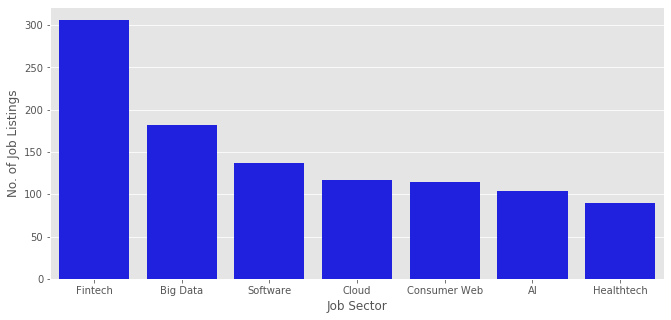

In [16]:
job_df = dfall[['jobs', 'job_t0']]
j_grp_df = job_df.groupby('job_t0')
key_list = j_grp_df.groups.keys()
j_sum_df = pd.DataFrame(j_grp_df.sum())
j_sum_df['industry'] = key_list
j_sum_df = j_sum_df.sort_values('jobs', ascending=False)
j_sum_df.replace(["Artificial Intelligence"],["AI"], inplace=True)
j_sub_df = j_sum_df.head(7)

a4_dims = (11, 5)
fig, ax = plt.subplots(figsize=a4_dims)
pp = sns.barplot(j_sub_df['industry'], j_sub_df['jobs'], ci=None, color='blue')
pp.set(xlabel='Job Sector', ylabel='No. of Job Listings')
figure = pp.get_figure()
pp.figure.savefig("jobs.png")
#med_list = df_grp.median()
#df_med = pd.DataFrame(scatter_df.groupby(['real_date'])['tot_employ'].median())
#df_med['date'] = range(1991,2020)
#sns.regplot(df_med['real_date'], df_med['tot_employ'], order=1)

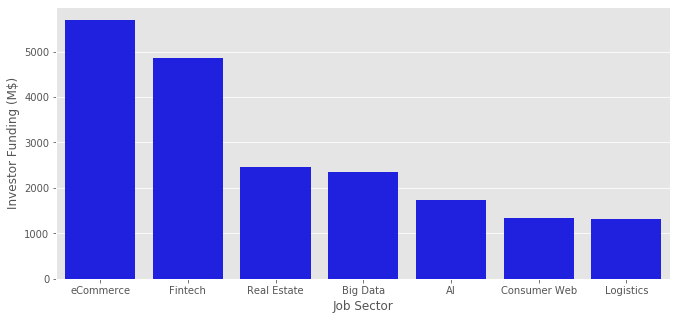

In [17]:
job_df = dfall[['funding', 'job_t0']]
j_grp_df = job_df.groupby('job_t0')
key_list = j_grp_df.groups.keys()
j_sum_df = pd.DataFrame(j_grp_df.sum())
j_sum_df['industry'] = key_list
j_sum_df = j_sum_df.sort_values('funding', ascending=False)
j_sum_df.replace(["Artificial Intelligence","Information Technology"],["AI", "IT"], inplace=True)
j_sub_df = j_sum_df.head(7)

a4_dims = (11, 5)
fig, ax = plt.subplots(figsize=a4_dims)
pp = sns.barplot(j_sub_df['industry'], j_sub_df['funding'], ci=None, color='blue')
pp.set(xlabel='Job Sector', ylabel='Investor Funding (M$)')
figure = pp.get_figure()
pp.figure.savefig("funding.png")

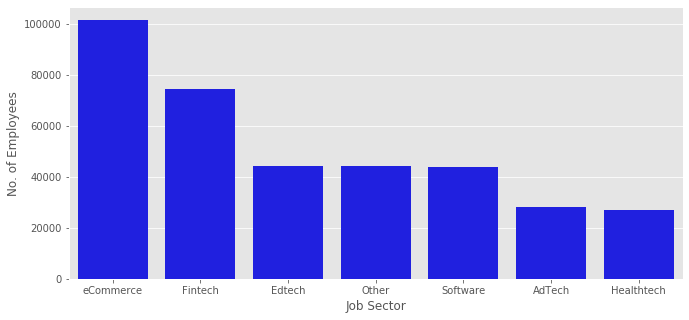

In [18]:
job_df = dfall[['tot_employ', 'job_t0']]
j_grp_df = job_df.groupby('job_t0')
key_list = j_grp_df.groups.keys()
j_sum_df = pd.DataFrame(j_grp_df.sum())
j_sum_df['industry'] = key_list
j_sum_df = j_sum_df.sort_values('tot_employ', ascending=False)
j_sum_df.replace(["Artificial Intelligence","Information Technology",
                 "Natural Language Processing"],["AI", "IT", "NLP"], inplace=True)
j_sub_df = j_sum_df.head(7)

a4_dims = (11, 5)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xlabel("Job Sector")
plt.ylabel("No. of Employees")
pp = sns.barplot(j_sub_df['industry'], j_sub_df['tot_employ'], ci=None, color='blue')
pp.set(xlabel='Job Sector', ylabel='No. of Employees')
figure = pp.get_figure()
pp.figure.savefig("employees.png")

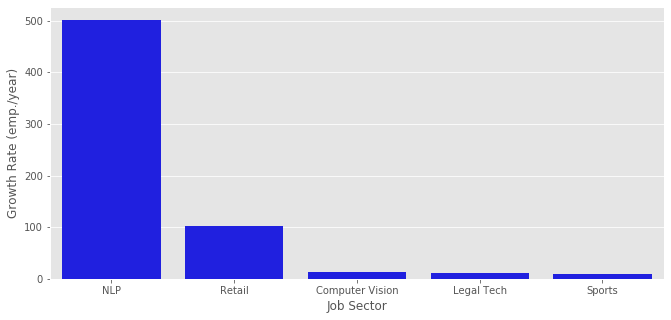

In [19]:
d_job_df = dfall[['date','job_t0']]
d_grp_df = d_job_df.groupby('job_t0')
key_list = d_grp_df.groups.keys()
d_sum_df = pd.DataFrame(d_grp_df.median())
d_sum_df['industry'] = key_list

job_df = dfall[['tot_employ','job_t0']]
j_grp_df = job_df.groupby('job_t0')
key_list = j_grp_df.groups.keys()
j_sum_df = pd.DataFrame(j_grp_df.median())
j_sum_df['industry'] = key_list

rate = pd.merge(d_sum_df, j_sum_df, on = 'industry')
rate['g_rate']= rate['tot_employ']/(2021-rate['date'])
rate = rate.sort_values('g_rate', ascending=False)
rate.replace(["Artificial Intelligence","Information Technology",
                 "Natural Language Processing"],["AI", "IT", "NLP"], inplace=True)
rate = rate.head(5)

a4_dims = (11, 5)
fig, ax = plt.subplots(figsize=a4_dims)
pp = sns.barplot(rate['industry'], rate['g_rate'], ci=None, color='blue')
pp.set(xlabel='Job Sector', ylabel='Growth Rate (emp./year)')
figure = pp.get_figure()
pp.figure.savefig("growth.png")


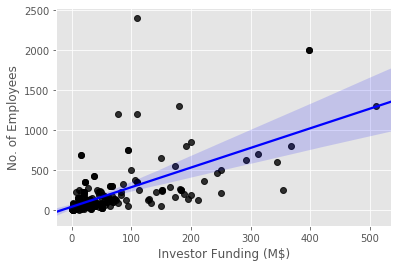

In [20]:
scatter_df = dfall[['funding','tot_employ']]
scatter_df = scatter_df.loc[scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
g = sns.regplot(scatter_df['funding'], scatter_df['tot_employ'], order=1, scatter_kws={"color": "black"}, line_kws={"color": "blue"})
g.set(xlabel='Investor Funding (M$)', ylabel='No. of Employees')
figure = g.get_figure()
g.figure.savefig("fund_scatter.png")

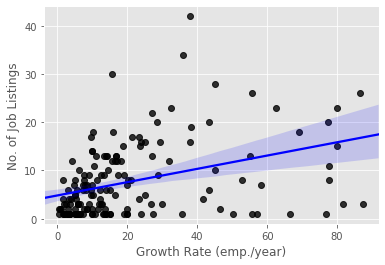

In [21]:
scatter_df = dfall[['g_rate','jobs']]
scatter_df = scatter_df.loc[(scatter_df['g_rate']<100) & (scatter_df['jobs']<50) ]
#scatter_df = scatter_df.loc[scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
#scatter_df.plot.scatter(x='funding', y='tot_employ')
g = sns.regplot(scatter_df['g_rate'], scatter_df['jobs'], order=1, scatter_kws={"color": "black"}, line_kws={"color": "blue"})
g.set(xlabel='Growth Rate (emp./year)', ylabel='No. of Job Listings')
figure = g.get_figure()
g.figure.savefig("growth_scatter.png")
#sns.regplot(scatter_df['g_rate'], scatter_df['jobs'], order=1)

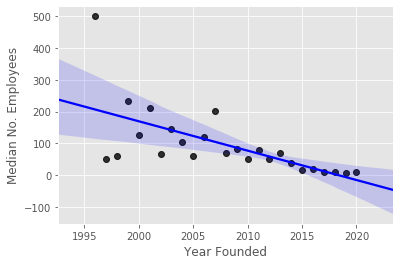

In [22]:
scatter_df = dfall[['date', 'tot_employ']]
scatter_df = scatter_df.loc[(scatter_df['date']>1995)]
scatter_df = scatter_df.sort_values('date')
df_med = pd.DataFrame(scatter_df.groupby(['date'])['tot_employ'].median())
df_med['date'] = range(1996,2021)
g = sns.regplot(df_med['date'], df_med['tot_employ'], order=1, scatter_kws={"color": "black"}, line_kws={"color": "blue"})
g.set(xlabel='Year Founded', ylabel='Median No. Employees')
figure = g.get_figure()
g.figure.savefig("date_scatter.png")
#g = sns.regplot(scatter_df['g_rate'], scatter_df['jobs'], order=1, scatter_kws={"color": "black"}, line_kws={"color": "blue"})